In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [2]:
df = pd.read_csv("mobile.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
df.touch_screen.value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

In [7]:
df.blue.value_counts()

0    1010
1     990
Name: blue, dtype: int64

In [8]:
df.wifi.value_counts()

1    1014
0     986
Name: wifi, dtype: int64

In [9]:
df.dual_sim.value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [10]:
df.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

px_height,px_width,ram -- mode

In [11]:
feature_scale=["px_height","px_width","ram","battery_power","mobile_wt"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[feature_scale])


MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
scaler.transform(df[feature_scale])

array([[0.01020408, 0.17089453, 0.61277392, 0.22778891, 0.9       ],
       [0.46173469, 0.99332443, 0.63468733, 0.34736139, 0.46666667],
       [0.64438776, 0.811749  , 0.6272047 , 0.04141617, 0.54166667],
       ...,
       [0.44285714, 0.75567423, 0.7485302 , 0.94188377, 0.23333333],
       [0.17142857, 0.11348465, 0.16381614, 0.6753507 , 0.54166667],
       [0.24642857, 0.16955941, 0.9788883 , 0.00601202, 0.73333333]])

In [13]:
df2 = pd.concat([df.reset_index(drop=True),pd.DataFrame(scaler.transform(df[feature_scale]),columns=["px_height1","px_width1","ram1","battery_power1","mobile_wt1"])],axis=1)
df2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,talk_time,three_g,touch_screen,wifi,price_range,px_height1,px_width1,ram1,battery_power1,mobile_wt1
0,842,0,2.2,0,1,0,7,0.6,188,2,...,19,0,0,1,1,0.010204,0.170895,0.612774,0.227789,0.900000
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,7,1,1,0,2,0.461735,0.993324,0.634687,0.347361,0.466667
2,563,1,0.5,1,2,1,41,0.9,145,5,...,9,1,1,0,2,0.644388,0.811749,0.627205,0.041416,0.541667
3,615,1,2.5,0,0,0,10,0.8,131,6,...,11,1,0,0,2,0.620408,0.858478,0.671566,0.076152,0.425000
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,15,1,1,0,1,0.616327,0.475300,0.308658,0.881764,0.508333


In [14]:
df2.drop(["px_height","px_width","ram","battery_power","mobile_wt"],axis=1,inplace=True)

In [15]:
x = df2.drop("price_range",axis=1)
y = df2["price_range"]

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.02048465 0.03399673 0.01976727 0.03233949 0.01758469 0.0352442
 0.03447079 0.03267871 0.03367934 0.0355994  0.03480196 0.03549895
 0.01489176 0.01848205 0.01963767 0.04658791 0.0486134  0.38998189
 0.06014118 0.03551796]


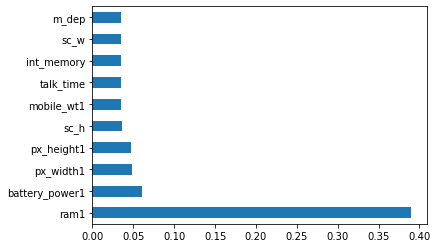

In [17]:
feat_importance = pd.Series(model.feature_importances_,index = x.columns)
feat_importance.nlargest(10).plot(kind='barh')

In [18]:
feat_importance.nlargest(10)

ram1              0.389982
battery_power1    0.060141
px_width1         0.048613
px_height1        0.046588
sc_h              0.035599
mobile_wt1        0.035518
talk_time         0.035499
int_memory        0.035244
sc_w              0.034802
m_dep             0.034471
dtype: float64

In [19]:
x = df2[['ram1','battery_power1','px_width1','px_height1','talk_time','mobile_wt1','int_memory','sc_h','sc_w','n_cores']]

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "entropy",max_depth=12,random_state=1)


In [21]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf,x,y,cv=7,scoring = "accuracy")
score.mean()

0.861506914138493

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=8,criterion="entropy",max_depth=12,random_state=1)

In [23]:
score = cross_val_score(clf,x,y,cv=7,scoring = "accuracy")
score.mean()

0.8709886604623447